In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dstapi import DstApi 
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 11})



# Dataproject - How has the Danish Economy performed through indicators?

This project will try to describe how the Danish economy has performed since the big Financial Crisis in 2008. Instead of looking directly at the GDP etc, we will look at key inicators in the Danish economy. We have chosen unemployment, as unemployment is often a good indicator for how the economy is performing. The unemployment tends to be higher when the economy is poor, as businesses scale back and vice versa. Secondly, we have chosen registered cars in Denmark as an indicator of consumption and trust in the economy. We assume individuals in Denmark to be weary of how they spend their capital. Therefore, when the economy is poor, individuals scale back on spending and luxury goods are often the ones, scaled back the hardest. Thus, we use registered cars as an indicator for how the consumption side of the Danish economy evovles. 

In [14]:
BIL800 = DstApi("BIL800") #Collecting data. Loading it directly from DST. 
AUL01 = DstApi("AUL01") #Collecting data. Loading it directly from DST.
tabBIL800 = BIL800.tablesummary(language='en')
tabAUL = AUL01.tablesummary(language='en')


#In order to set up the parameters for the collection of data, we need to know, which parameters, we are working with.
#Therefore, display each variable in the dataset and its different values
for variable in tabBIL800['variable name']:
    print(variable+':')
    display(BIL800.variable_levels(variable, language='en'))

for variable in tabAUL['variable name']:
    print(variable+':')
    display(AUL01.variable_levels(variable, language='en'))



Table BIL800: Families disposal of vehicles by region, pattern of availability and time
Last update: 2022-07-01T08:00:00
Table AUL01: Full-time unemployed persons by region, type of benefits, unemployment insurance fund, age, sex and time
Last update: 2023-04-14T08:00:00
OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,01,Province Byen København
3,101,Copenhagen
4,147,Frederiksberg
...,...,...
112,840,Rebild
113,787,Thisted
114,820,Vesthimmerlands
115,851,Aalborg


RAADMOENS:


,id,text
0,10000,"Families, total"
1,10200,"Families without cars, total"
2,10210,"Families with cars, total"
3,10220,"Families with 1 car, total"
4,10230,Families with 1 private car
5,10240,Families with 1 company car
6,10250,Families with 1 van
7,10260,"Families with 2 cars, total"
8,10270,Families with 2 private cars
9,10280,Families with 2 company cars


Tid:


,id,text
0,2007,2007
1,2008,2008
2,2009,2009
3,2010,2010
4,2011,2011
5,2012,2012
6,2013,2013
7,2014,2014
8,2015,2015
9,2016,2016


OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,01,Province Byen København
3,101,Copenhagen
4,147,Frederiksberg
...,...,...
112,787,Thisted
113,820,Vesthimmerlands
114,851,Aalborg
115,998,Unknown municipality


YDELSESTYPE:


,id,text
0,TOT,Gross unemployment
1,LDP,Net unemployed recipients of unemployment bene...
2,LKT,Net unemployed recipients of social assistance
3,ADP,Activation of persons on unemployment benefits
4,AKT,Activation of persons on social assistance (pr...


AKASSE:


,id,text
0,TOT,Total
1,48,Akademikernes (fra 1. juli 2013 inkl. ingeniører)
2,46,Din Faglige A-kasse (fra 1. januar 2021 inkl. ...
3,05,Børne- og Ungdomspædagoger (BUPL-A)
4,06,Din Sundhedsfaglige A-kasse (DSA)
5,40,Det Faglige Hus A-kasse
6,44,Fag og Arbejde (FOA)
7,43,Faglig Fælles a-kasse (3F)
8,11,A-kassen Frie (fra 1. januar 2020 inkl. DANA)
9,13,Funktionærer og Tjenestemænd (FTF-A)


ALDER:


,id,text
0,TOT,"Age, total"
1,16-24,16-24 years
2,25-29,25-29 years
3,30-34,30-34 years
4,35-39,35-39 years
5,40-44,40-44 years
6,45-49,45-49 years
7,50-54,50-54 years
8,55-59,55-59 years
9,6099,60 year and over


KØN:


,id,text
0,TOT,Total
1,M,Men
2,K,Women


Tid:


,id,text
0,2007,2007
1,2008,2008
2,2009,2009
3,2010,2010
4,2011,2011
5,2012,2012
6,2013,2013
7,2014,2014
8,2015,2015
9,2016,2016


In [15]:
paramBIL800 = BIL800._define_base_params(language='en') #We then identify the base parameters in the dataset and print it. 
paramBIL800


{'table': 'bil800',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'RAADMOENS', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [16]:
paramAUL = AUL01._define_base_params(language='en') #We do it for both datasets
paramAUL


{'table': 'aul01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'YDELSESTYPE', 'values': ['*']},
  {'code': 'AKASSE', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [17]:
variables = paramBIL800['variables'] # Returns a view of the variables in which we can edit
variables[1]['values'] = ['*']
paramBIL800

{'table': 'bil800',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'RAADMOENS', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [18]:
variables = paramAUL['variables'] # Same thing for the second dataset
variables[1]['values'] = ['*']
paramAUL

{'table': 'aul01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'YDELSESTYPE', 'values': ['*']},
  {'code': 'AKASSE', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [19]:
paramBIL = {'table': 'bil800', #For both datasets, we specify the exact amount of data we want to retrieve from STATBANK.dk. 
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['000']},
  {'code': 'RAADMOENS', 'values': ['10000']},
  {'code': 'Tid', 'values': ['>=2007<=2022']}]}
#The value ids are collected from the tables created above 
paramAUL =  {'table': 'aul01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['000']},
  {'code': 'YDELSESTYPE', 'values': ['TOT']},
  {'code': 'AKASSE', 'values': ['TOT']},
  {'code': 'ALDER', 'values': ['TOT']},
  {'code': 'KØN', 'values': ['TOT']},
  {'code': 'Tid', 'values': ['*']}]}



BIL = BIL800.get_data(params=paramBIL)
AUL = AUL01.get_data(params=paramAUL)


print(AUL.head())
print(BIL.head())



        OMRÅDE         YDELSESTYPE AKASSE       ALDER    KØN   TID  INDHOLD
0  All Denmark  Gross unemployment  Total  Age, total  Total  2007   101401
1  All Denmark  Gross unemployment  Total  Age, total  Total  2008    73145
2  All Denmark  Gross unemployment  Total  Age, total  Total  2009   130232
3  All Denmark  Gross unemployment  Total  Age, total  Total  2010   163524
4  All Denmark  Gross unemployment  Total  Age, total  Total  2011   159244
        OMRÅDE        RAADMOENS   TID  INDHOLD
0  All Denmark  Families, total  2007  2763036
1  All Denmark  Families, total  2008  2784805
2  All Denmark  Families, total  2009  2809760
3  All Denmark  Families, total  2010  2827449
4  All Denmark  Families, total  2011  2846699


In [20]:
paramBIL = {'table': 'bil800',
            'format': 'BULK',
            'lang': 'en',
            'variables': [{'code': 'OMRÅDE', 'values': ['000']},
                          {'code': 'RAADMOENS', 'values': ['10000']},
                          {'code': 'Tid', 'values': ['>=2007<=2022']}]}
# The value ids are collected from the tables created above 
paramAUL = {'table': 'aul01',
            'format': 'BULK',
            'lang': 'en',
            'variables': [{'code': 'OMRÅDE', 'values': ['000']},
                          {'code': 'YDELSESTYPE', 'values': ['TOT']},
                          {'code': 'AKASSE', 'values': ['TOT']},
                          {'code': 'ALDER', 'values': ['TOT']},
                          {'code': 'KØN', 'values': ['TOT']},
                          {'code': 'Tid', 'values': ['*']}]}


BIL = BIL800.get_data(params=paramBIL)
AUL = AUL01.get_data(params=paramAUL)

print(AUL.head())
print(BIL.head())

        OMRÅDE         YDELSESTYPE AKASSE       ALDER    KØN   TID  INDHOLD
0  All Denmark  Gross unemployment  Total  Age, total  Total  2007   101401
1  All Denmark  Gross unemployment  Total  Age, total  Total  2008    73145
2  All Denmark  Gross unemployment  Total  Age, total  Total  2009   130232
3  All Denmark  Gross unemployment  Total  Age, total  Total  2010   163524
4  All Denmark  Gross unemployment  Total  Age, total  Total  2011   159244
        OMRÅDE        RAADMOENS   TID  INDHOLD
0  All Denmark  Families, total  2007  2763036
1  All Denmark  Families, total  2008  2784805
2  All Denmark  Families, total  2009  2809760
3  All Denmark  Families, total  2010  2827449
4  All Denmark  Families, total  2011  2846699


In [21]:
AUL_Sorted = AUL.sort_values('TID') #To make it cleaner, we then sort the data after year
BIL_Sorted = BIL.sort_values('TID')
AUL_Sorted=AUL_Sorted.rename(columns={ 'TID':'YEAR', 'INDHOLD' : 'Unemployed'}) #Furthermore, we rename columms. 
BIL_Sorted=BIL_Sorted.rename(columns={'TID':'YEAR', 'INDHOLD' : 'Number of Cars'})
BIL_Sorted['Yearly Change(CARS)'] = BIL_Sorted['Number of Cars'].pct_change().shift(-1) * 100 # We then want the yearly percentage change
AUL_Sorted['Yearly Change(UEMP)'] = AUL_Sorted['Unemployed'].pct_change().shift(-1) * 100 
#We want to present the number of unemployed in terms of thousands.
AUL_Sorted['Unemployed'] = AUL_Sorted['Unemployed']/1000
BIL_Sorted['Number of Cars'] = BIL_Sorted['Number of Cars']/10000
AULSorted=AUL_Sorted.drop(columns = ['OMRÅDE', 'YDELSESTYPE', 'AKASSE', 'ALDER']) #We then drop columns we do not use
BILSorted=BIL_Sorted.drop(columns = ['OMRÅDE', 'RAADMOENS'])
Merged = pd.merge(AULSorted,BILSorted,how='inner',on=['YEAR']) #We then merge the two datasets on the basis of the year. 
print(Merged.head())


     KØN  YEAR  Unemployed  Yearly Change(UEMP)  Number of Cars  \
0  Total  2007     101.401           -27.865603        276.3036   
1  Total  2008      73.145            78.046346        278.4805   
2  Total  2009     130.232            25.563610        280.9760   
3  Total  2010     163.524            -2.617353        282.7449   
4  Total  2011     159.244             1.254678        284.6699   

   Yearly Change(CARS)  
0             0.787865  
1             0.896113  
2             0.629556  
3             0.680826  
4             0.736186  


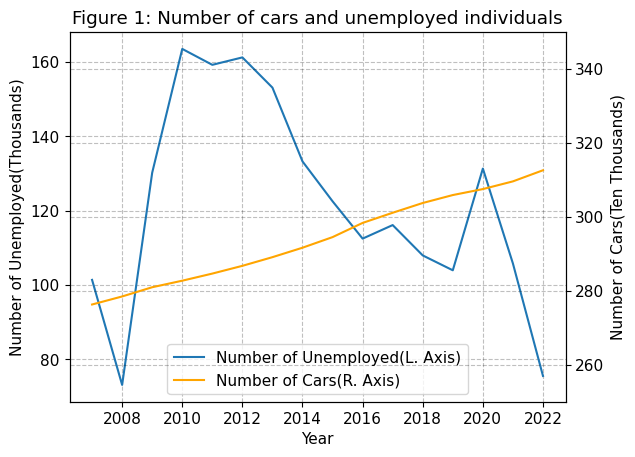

In [22]:
#We then create a plot
fig, ax1 = plt.subplots()
ax1.plot(Merged['YEAR'], Merged['Unemployed'], label='Number of Unemployed(L. Axis)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Unemployed(Thousands)')

#Because the two merged values have different formats, we create a secondary axis in order to better show the results
ax2 = ax1.twinx()
ax2.plot(Merged['YEAR'], Merged['Number of Cars'], color='orange', label='Number of Cars(R. Axis)')
ax2.set_ylabel('Number of Cars(Ten Thousands)')

# Creating bounds for the secondary axis.
ax2.set_ylim([250, 350]) 

# Because we have created a secondary axis, we have two legends. The code below simplifies it and create a singular legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

#We then title it 
plt.title('Figure 1: Number of cars and unemployed individuals')

#Displaying it 
plt.show()


From the plot above, their seems to be no correlation between the amount of cars and the number of unemployed individuals. Therefore, we computed the yearly change in both numbers in order to find some correlation and indications of how the Danish economy has been evolving over the last decade.

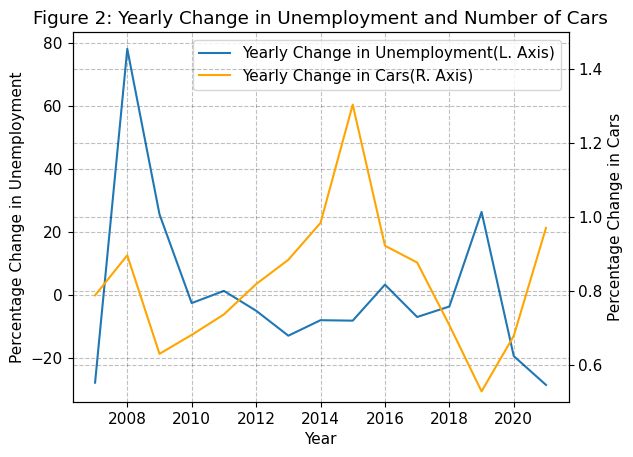

In [23]:
#We then create a plot
fig, ax1 = plt.subplots()
ax1.plot(Merged['YEAR'], Merged['Yearly Change(UEMP)'], label='Yearly Change in Unemployment(L. Axis)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage Change in Unemployment')

#Because the two merged values have different formats, we create a secondary axis in order to better show the results
ax2 = ax1.twinx()
ax2.plot(Merged['YEAR'], Merged['Yearly Change(CARS)'], color='orange', label='Yearly Change in Cars(R. Axis)')
ax2.set_ylabel('Percentage Change in Cars')

# Creating bounds for the secondary axis.
ax2.set_ylim([0.5, 1.5]) 

# Because we have created a secondary axis, we have two legends. The code below simplifies it and create a singular legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

#We then title it 
plt.title('Figure 2: Yearly Change in Unemployment and Number of Cars')

#Displaying it 
plt.show()


Albeit little, we notice some correlation between the number of unemployed induviduals and the aquisitions of new cars by the Danish population. When the financial crisis hit the Danish economy, we see a large increase in the number of unemployed individuals. This correlates well with a slight decrease in the number of cars in Denmark. The unemployment quickly falls again, which leads to investments in new cars again, peaking in 2015. The amount of new cars registered falls again, after a little spike in the unemployment rate. In 2019, the clearest correlation is seen, when the amont of new cars regigistered falls and the unemployment rises. TO conclude, we see signs of how the Danish economy has been performing over the last decade. Furthermore, we see clearly, how the business cycles roll through